In [ ]:
## Print multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [ ]:
## Reading relevant data
match_lvl_data = pd.read_csv('/content/664389efa0868_match_level_scorecard.csv')
batsman_lvl_data = pd.read_csv('/content/663e2b548c98c_batsman_level_scorecard.csv')
bowler_lvl_data = pd.read_csv('/content/663e2b2c60743_bowler_level_scorecard.csv')
train_data = pd.read_csv('/content/663e2b6d54457_train_data_with_samplefeatures.csv')
test_data = pd.read_csv('/content/6644a1e287df6_test_data_with_samplefeatures (4).csv')

In [ ]:
train_data

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.00,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.00,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.00,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,...,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.00,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.00,189.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,Pb Ks,30407,Ci Sr Ks,...,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,166.400000
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,St,9701,St,...,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,Wn Pe,23869,Bd,...,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,Ss Hd,36014,Rn Rs,...,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000


In [ ]:
match_lvl_data.shape
match_lvl_data.head(2)


# In[6]:


batsman_lvl_data.shape
batsman_lvl_data.head(2)


# In[7]:


bowler_lvl_data.shape
bowler_lvl_data.head(2)


# In[8]:


train_data.shape
train_data.head(2)


# In[9]:


test_data.shape
test_data.head(2)

(1689, 30)

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,...,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,...,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0


(6531, 21)

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,...,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1.0,7.0,5.0,1.1,...,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.0,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1.0,46.0,46.0,1.2,...,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.0,4.0,1.0,2021-01-01


(9515, 18)

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,match_dt
0,8638034,BV Ss,6718396.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1.0,21.0,0.0,12.0,10.5,0.0,3.0,1.0,1.0,3.0,1.0,2021-01-01
1,8638034,HK Bt,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1.0,34.0,1.0,24.0,8.5,0.0,7.0,3.0,1.0,2.0,0.0,2021-01-01


(948, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000


(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,...,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,...,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


In [ ]:
train_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
def fn1(row):
  if(row['winner_id']==row['team1_id']):
    return 0
  else:
    return 1

In [ ]:
train_data['winner_01']=train_data.apply(fn1,axis=1)

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn');
import re

<ipython-input-9-3cb932e98a07>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


In [ ]:
def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.

    Parameters-
    1. X_12: dataset to build the RnP on.
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.

    Output-
    1. Rank and Plot

    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();


In [ ]:
def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    '''
    Function to get last n games stats of a player before an input date.

    Input-
    1. player_id: id of the player to get historical data.
    2. date: date to look-back and get n games. Stats returned are before this input date.
    3. n: Number of historical games stats to return.
    4. bat_or_bowl: Kind of stats to return. {'bat': batting stats to return, 'bowl': bowling stats to return}

    Output-None

    Returns- dataframe having bowling/batting stats from last n games of a player before an input date.
    The results are sorted by date.
    '''
    if bat_or_bowl == 'bat':
        df_topick = batsman_lvl_data
        id_col = 'batsman_id'
    else:
        df_topick = bowler_lvl_data
        id_col = 'bowler_id'

    return df_topick[(df_topick['match_dt']<date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

In [ ]:
# ## Feature creation
def no50sLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['gte_50runs'] = np.where(df_rel['runs']>=50, 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['gte_50runs']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [ ]:
# # Computing number of 50 runs in last 15 games for team1 for train dataset.
# train_data['team1_count_50runs_last15'] = train_data.progress_apply(lambda x: \
#             no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Computing number of 50 runs in last 15 games for team2 for train dataset.
# train_data['team2_count_50runs_last15'] = train_data.progress_apply(lambda x: \
#             no50sLastn(player_list=x['team2_roster_idsp'], date=x['match_dt'], n=15), axis=1)

In [ ]:
# # Taking ratio of (number of 50 runs in last 15 games for team1) to (number of 50 runs in last 15 games for team2). Adding 1 to handle divide by zero exceptions.
# train_data['team_count_50runs_last15'] = (train_data['team1_count_50runs_last15']+1)/(train_data['team2_count_50runs_last15']+1)
# train_data.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True) # dropping intermediate columns

slope: 0.6 / 0.39 =  1.53


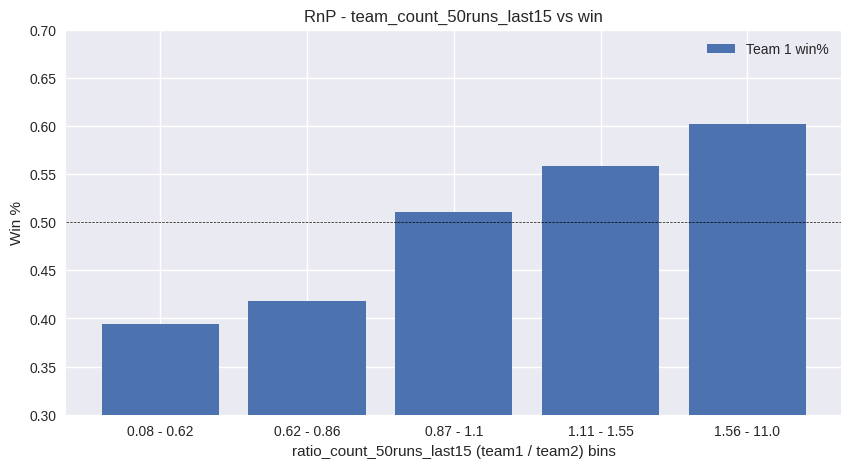

In [ ]:
createRnP(train_data, 'team_count_50runs_last15')

In [ ]:
# test_data['team1_count_50runs_last15'] = test_data.progress_apply(lambda x: \
#             no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# test_data['team2_count_50runs_last15'] = test_data.progress_apply(lambda x: \
#             no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# test_data['team_count_50runs_last15'] = (test_data['team1_count_50runs_last15'])/(test_data['team2_count_50runs_last15']+1)
# test_data.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True)
# test_data.shape
# test_data.head(2)

In [ ]:
def winpLastn(team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.

    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.

    Output- None

    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points


In [ ]:
# # Compute team1's win% in last 5 games
# train_data['team1_winp_last5'] = train_data.progress_apply(lambda x: \
#                                   winpLastn(x['team1_id'], x['match_dt'], 5), axis=1)
# # Compute team2's win% in last 5 games
# train_data['team2_winp_last5'] = train_data.progress_apply(lambda x: \
#                                   winpLastn(x['team2_id'], x['match_dt'], 5), axis=1)

In [ ]:
# # Take the ratio of (team1's win% in their last 5 games)/(team2's win% in their last 5 games). Adding 1 to avoid divide by zero error
# train_data['team_winp_last5'] = (train_data['team1_winp_last5']+1)/(train_data['team2_winp_last5']+1)
# train_data.drop(columns=['team1_winp_last5', 'team2_winp_last5'], inplace=True) # drop intermediate columns


# # In[23]:


# train_data.shape
# train_data.head(2)


# # In[24]:


# ## Similar process for test data

# test_data['team1_winp_last5'] = test_data.progress_apply(lambda x: \
#             winpLastn(team_id=x['team1_id'], date=x['match_dt'], n=5), axis=1)
# test_data['team2_winp_last5'] = test_data.progress_apply(lambda x: \
#             winpLastn(team_id=x['team2_id'], date=x['match_dt'], n=5), axis=1)
# test_data['team_winp_last5'] = (test_data['team1_winp_last5']+1)/(test_data['team2_winp_last5']+1)
# test_data.drop(columns=['team1_winp_last5','team2_winp_last5'], inplace=True)
# test_data.shape
# test_data.head(2)


slope: 0.58 / 0.4 =  1.47


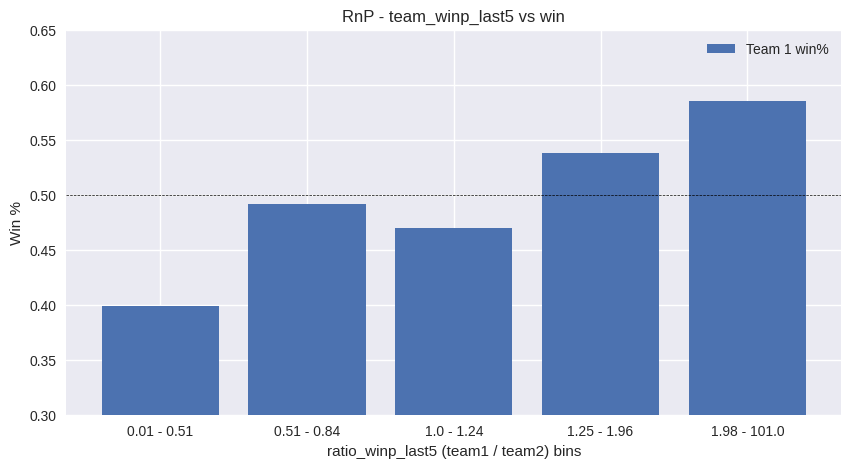

In [ ]:
createRnP(train_data, 'team_winp_last5', ylim_ub=0.65)

In [ ]:
## derived feature computed using toss winner & toss decision to denote the inning team1 bats.
# If team1 won the toss and chose to bat or team2 won the toss and chose to bowl, the feature takes the value 1, else 2.
match_lvl_data['team1_bat_inning'] = np.where( ((match_lvl_data['team1']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='bat'))|\
                                               ((match_lvl_data['team2']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='field')) , 1, 2)

In [ ]:
def teamAvgRunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.

    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.

    Output- None

    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team1_bat_inning']==1][['inning1_runs']].rename(columns={'inning1_runs':'runs'}), \
                         df_rel[df_rel['team1_bat_inning']==2][['inning2_runs']].rename(columns={'inning2_runs':'runs'}) ] )
    return df_rel['runs'].mean() # return mean of the combined dataframe.


In [ ]:
# # Compute average runs scored by team1 in their last 15 games for train data.
# train_data['team1only_avg_runs_last15'] = train_data.progress_apply(lambda x: \
#                                   teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)


# # In[31]:


# # Similarly for test data.
# test_data['team1only_avg_runs_last15'] = test_data.progress_apply(lambda x: \
#             teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)
# test_data.shape
# test_data.head(2)


# # In[32]:


# train_data.shape
# train_data.head(2)

In [ ]:
def winpCrossLastn(team1_id, team2_id, date, n):
    '''
    Function to compute team1's win% against team2 from the current game in their past n encounters.

    Input-
    1. team1_id: ID of team1 to calculate win% of.
    2. team2_id: ID of team2 to calculate win% against.
    3: date: match date of the current game for which the feature is to be calculated.
    4. n: look-back window of games for both these teams.

    Output- None

    Returns- Float value denoting team1's win% against team2 in their past n games against each other.
    '''
    # filter out games where either team1_id is input team1 and team2_id is input team2, or where team2_id is input team1 and team1_id is input team2.
    # Also, match date is less than current games's input date, sort desc by date and get top n rows (games)
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      (((match_lvl_data['team1_id']==team1_id)&(match_lvl_data['team2_id']==team2_id))|((match_lvl_data['team1_id']==team2_id)&(match_lvl_data['team2_id']==team1_id)))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team1_id].shape[0] # Counting number of rows (games) where winner is input team1.
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return Float denoting team1's win% against team2 in past n games rounded to 2 decimal places.


In [ ]:
# # Compute team1 win% against team2 in their past 15 encounters for train data.
# train_data['team1_winp_team2_last15'] = train_data.progress_apply(lambda x: \
#                                   winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)
# Similarly for test data.
# test_data['team1_winp_team2_last15'] = test_data.progress_apply(lambda x: \
#                                   winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)

In [ ]:
def avgRunsGround(ground_id, date, n):
    '''
    Function to calculate average runs scored in ground/venue.

    Input-
    1. ground_id: ID of the ground to calculate the feature for.
    2. date: match date of the current game to calculate the feature for.
    3. n: look-back window of games for the ground.

    Output- None

    Returns- Average runs scored in the ground.
    '''
    # filter out games with ground_id being the input ground_id and date earlier than current game's input date. Sort desc by date, and select top n rows (games).
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&(match_lvl_data['ground_id']==ground_id)].sort_values(by='match_dt', ascending=False).head(n)
    df_rel['avg_runs_inn'] = (df_rel['inning1_runs']+df_rel['inning2_runs'])/2 # take the mean of inning1_runs and inning2_runs in a separate column.
    return df_rel['avg_runs_inn'].mean() # Return the mean value of the computed column above.


In [ ]:
# ## Calculate average runs in the ground for last 15 games hosted in that venue for train data.
# train_data['ground_avg_runs_last15'] = train_data.progress_apply(lambda x: \
#                                   avgRunsGround(x['ground_id'], x['match_dt'], 15), axis=1)
# ## Similarly for test data.
# test_data['ground_avg_runs_last15'] = test_data.progress_apply(lambda x: \
#                                   avgRunsGround(x['ground_id'], x['match_dt'], 15), axis=1)

In [ ]:
#function for count of 5+ wickets by all the players in the roster for a team last n matches
def moreThan5WicketsinLastn(player_ids,date,n,nw):
  player_list=str(player_ids).split(':')
  count=1
  for player in player_list:
    df_rel=giveLastNgamesPlayer(player_id=player,date=date,n=n,bat_or_bowl='bowl')
    df_rel[f'gte_{nw}wickets']=np.where(df_rel['wicket_count']>=nw,1,0)
    count+=np.nansum(df_rel[f'gte_{nw}wickets'])
  return count

In [ ]:
train_data['count3wickets15team1']=train_data.progress_apply(lambda x: moreThan5WicketsinLastn(x['team1_roster_ids'],x['match_dt'],15,3),axis=1)
train_data['count3wickets15team2']=train_data.progress_apply(lambda x: moreThan5WicketsinLastn(x['team2_roster_ids'],x['match_dt'],15,3),axis=1)

100%|██████████| 948/948 [00:32<00:00, 29.18it/s]


In [ ]:
test_data['count3wickets15team1']=test_data.progress_apply(lambda x: moreThan5WicketsinLastn(x['team1_roster_ids'],x['match_dt'],15,3),axis=1)
test_data['count3wickets15team2']=test_data.progress_apply(lambda x: moreThan5WicketsinLastn(x['team2_roster_ids'],x['match_dt'],15,3),axis=1)

100%|██████████| 271/271 [00:08<00:00, 32.84it/s]


In [ ]:
train_data['rcount3wickets15']=train_data['count3wickets15team1']/(train_data['count3wickets15team2'])
test_data['rcount3wickets15']=test_data['count3wickets15team1']/(test_data['count3wickets15team2'])

slope: 0.58 / 0.37 =  1.57


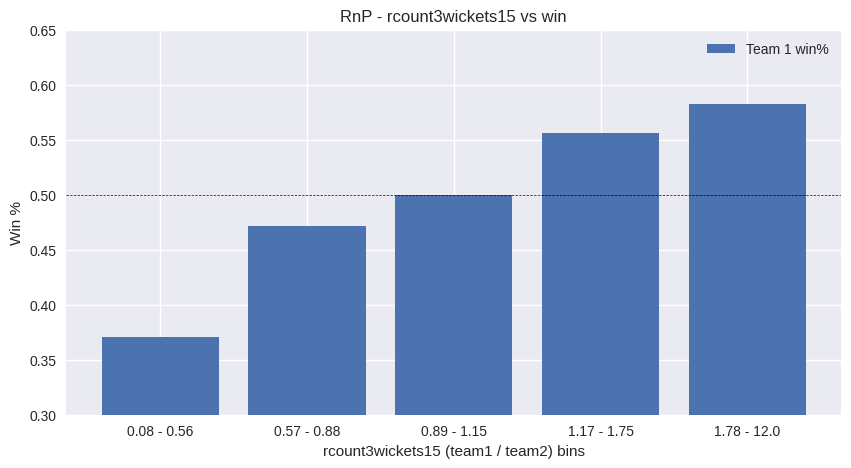

In [ ]:
createRnP(train_data, 'rcount3wickets15', ylim_ub=0.65)

In [ ]:
#function for average bowling economy of all the players of the team from last n matches
def averageBowlingEconomy(player_ids,date,n):
  player_list=str(player_ids).split(':')
  avg=0
  for player in player_list:
    df_rel=giveLastNgamesPlayer(player_id=player,date=date,n=n,bat_or_bowl='bowl')
    avg+=np.nansum(df_rel['economy'])
    # count=len(df_rel[df_rel['economy']!=0])
    # if count!=0:
    #   avg/=count
  return avg/len(player_list)

In [ ]:
# ##checks
# player_ids=train_data['team1_roster_ids'][0]
# player_list=str(player_ids).split(':')
# date=train_data['match_dt'][0]
# n=15
# print(player_list)
# avg=0
# for player in player_list:
#     print(player)
#     df_rel=giveLastNgamesPlayer(player_id=player,date=date,n=10,bat_or_bowl='bowl')
#     print(df_rel.head(4))
#     avg+=df_rel['economy'].mean()
#     print(avg)
#     break

In [ ]:
train_data['bowling_average_team1_10']=train_data.progress_apply(lambda x: averageBowlingEconomy(x['team1_roster_ids'],x['match_dt'],10),axis=1)
train_data['bowling_average_team2_10']=train_data.progress_apply(lambda x: averageBowlingEconomy(x['team2_roster_ids'],x['match_dt'],10),axis=1)

100%|██████████| 948/948 [00:21<00:00, 43.19it/s]


In [ ]:
test_data['bowling_average_team1_10']=test_data.progress_apply(lambda x: averageBowlingEconomy(x['team1_roster_ids'],x['match_dt'],10),axis=1)
test_data['bowling_average_team2_10']=test_data.progress_apply(lambda x: averageBowlingEconomy(x['team2_roster_ids'],x['match_dt'],10),axis=1)

100%|██████████| 271/271 [00:05<00:00, 48.06it/s]


In [ ]:
train_data['bowling_average_team1_10']

0      24.168333
1      43.030909
2      39.482727
3      44.600909
4      43.796667
         ...    
943    44.692727
944    27.435455
945    10.242727
946    38.812500
947    39.952727
Name: bowling_average_team1_10, Length: 948, dtype: float64

slope: 0.54 / 0.41 =  1.34


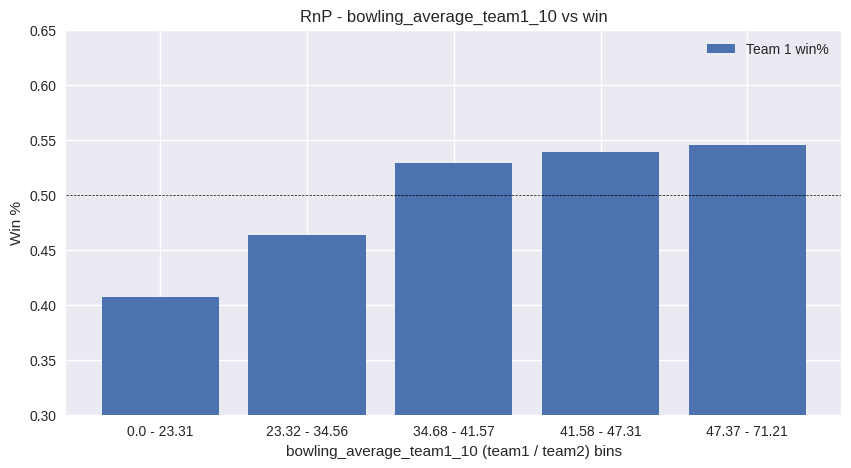

In [ ]:
createRnP(train_data, 'bowling_average_team1_10', ylim_ub=0.65)

In [ ]:
#average wickets by the team in the last n matches
def average_wickets(team_id,n,date):
  df_rel=match_lvl_data[(match_lvl_data['match_dt']<date)&((match_lvl_data['team1_id']==team_id)| (match_lvl_data['team2_id']==team_id))].sort_values(by='match_dt', ascending=False).head(n)
  #'team1_bat_inning',inning1_wickets,inning2_wickets
  df_com=pd.concat([df_rel[df_rel['team1_bat_inning']==1][['inning2_wickets']].rename(columns={'inning2_wickets':'wickets'}),\
                    df_rel[df_rel['team1_bat_inning']==2][['inning1_wickets']].rename(columns={'inning1_wickets':'wickets'})])
  return df_com['wickets'].mean()

In [ ]:
train_data['average_wickets_1']=train_data.progress_apply(lambda x: average_wickets(x['team1_id'],15,x['match_dt']),axis=1)
train_data['average_wickets_2']=train_data.progress_apply(lambda x: average_wickets(x['team2_id'],15,x['match_dt']),axis=1)


100%|██████████| 948/948 [00:05<00:00, 185.53it/s]


In [ ]:
test_data['average_wickets_1']=test_data.progress_apply(lambda x: average_wickets(x['team1_id'],15,x['match_dt']),axis=1)
test_data['average_wickets_2']=test_data.progress_apply(lambda x: average_wickets(x['team2_id'],15,x['match_dt']),axis=1)


100%|██████████| 271/271 [00:01<00:00, 201.43it/s]


In [ ]:
train_data['average_wickets_1']

slope: 0.58 / 0.5 =  1.15


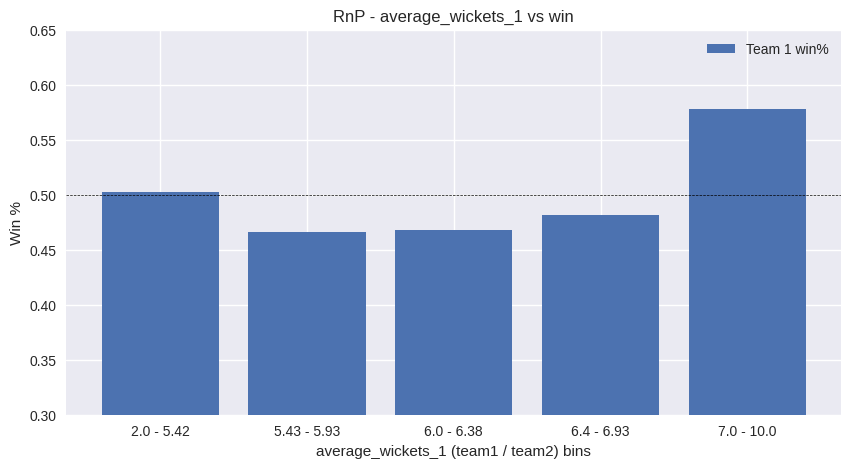

In [ ]:
createRnP(train_data, 'average_wickets_1', ylim_ub=0.65)

In [ ]:
#venue wise specific team winning probablity
def winpVenue(team_id,ground_id,date,n):
  df_rel=match_lvl_data[(match_lvl_data['match_dt']<date) & (match_lvl_data['ground_id'] == ground_id) & \
                        ((match_lvl_data['team1_id'] == team_id) | (match_lvl_data['team2_id'] == team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
  win_count=df_rel[df_rel['winner_id']==team_id].shape[0]
  if win_count==0:
    return 0
  return round(win_count*100/df_rel.shape[0],2)


In [ ]:
train_data['win_probablity_venue_team1']=train_data.progress_apply(lambda x: winpVenue(x['team1_id'],x['ground_id'],x['match_dt'],15),axis=1)
train_data['win_probablity_venue_team2']=train_data.progress_apply(lambda x: winpVenue(x['team2_id'],x['ground_id'],x['match_dt'],15),axis=1)

100%|██████████| 948/948 [00:02<00:00, 386.29it/s]


In [ ]:
test_data['win_probablity_venue_team1']=test_data.progress_apply(lambda x: winpVenue(x['team1_id'],x['ground_id'],x['match_dt'],15),axis=1)
test_data['win_probablity_venue_team2']=test_data.progress_apply(lambda x: winpVenue(x['team2_id'],x['ground_id'],x['match_dt'],15),axis=1)

In [ ]:
#Preprocess
train_data['toss_winner_01']=np.where(train_data['toss winner']==train_data['team1'],0,1)
test_data['toss_winner_01']=np.where(test_data['toss winner']==test_data['team1'],0,1)

In [ ]:
train_data['toss_decision_01']=np.where(train_data['toss decision']=='bat',1,0)
test_data['toss_decision_01']=np.where(test_data['toss decision']=='bat',1,0)

In [ ]:
train_data.columns
match_lvl_data.columns
batsman_lvl_data.columns
bowler_lvl_data.columns

In [ ]:
#selecting relevant columns

In [ ]:
X,y = train_data[['toss_winner_01','toss_decision_01','team_count_50runs_last15','team_winp_last5','team1only_avg_runs_last15','team1_winp_team2_last15','ground_avg_runs_last15','rcount3wickets15', 'bowling_average_team1_10','average_wickets_1','win_probablity_venue_team1']], train_data['winner_01']

In [ ]:
X_test=test_data[X.columns.tolist()]

Imputation

In [ ]:
X_nans=X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]
X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

,index,0
4,team1only_avg_runs_last15,21
6,ground_avg_runs_last15,53
9,average_wickets_1,21


,index,0
4,team1only_avg_runs_last15,7
6,ground_avg_runs_last15,10
9,average_wickets_1,7


In [ ]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

<ipython-input-54-bd600549b45e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
<ipython-input-54-bd600549b45e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


In [ ]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

,index,0


,index,0


In [ ]:
#Stats

In [ ]:
X['toss_winner_01'].value_counts()
X['toss_decision_01'].value_counts()
X['team_count_50runs_last15'].describe()

toss_winner_01
1    617
0    331
Name: count, dtype: int64

toss_decision_01
0    617
1    331
Name: count, dtype: int64

count    948.000000
mean       1.202602
std        1.008793
min        0.083333
25%        0.686678
50%        1.000000
75%        1.400000
max       11.000000
Name: team_count_50runs_last15, dtype: float64

In [ ]:
####
# train=pd.concat([X,y],axis=1)
# train.to_csv('final_train.csv', index=False)
# X_test.to_csv('final_test.csv')

In [ ]:
train=pd.read_csv('final_train.csv')
test=pd.read_csv('final_test.csv')

In [ ]:
X_train=train.drop(columns=['winner_01'])
y_train=train['winner_01']

In [ ]:
X_train

NameError: name 'train_test_split' is not defined

In [ ]:
# pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
import catboost as catb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import random as r

In [ ]:
test.head()

,Unnamed: 0,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,rcount3wickets15,bowling_average_team1_10,average_wickets_1,win_probablity_venue_team1
0,0,1,0,0.000000,0.019608,0.000000,0.00,0.000,0.250000,0.000000,0.000000,0.00
1,1,1,0,0.615385,0.344262,151.285714,66.67,153.500,1.300000,43.620000,6.714286,0.00
2,2,0,1,0.842105,0.753086,171.066667,100.00,179.625,0.875000,57.430909,6.066667,100.00
3,3,1,0,0.285714,1.487805,166.000000,75.00,155.500,1.500000,32.643636,7.266667,33.33
4,4,1,0,2.375000,0.310330,169.933333,0.00,164.125,1.166667,49.899091,5.866667,0.00


In [ ]:
X=train.drop(columns=['winner_01'])
y=train['winner_01']

In [ ]:
def amex_metric_numpy(y_true: np.array, y_pred: np.array) -> float:

    # count of positives and negatives
    n_pos = y_true.sum()
    n_neg = y_true.shape[0] - n_pos

    # sorting by descring prediction values
    indices = np.argsort(y_pred)[::-1]
    preds, target = y_pred[indices], y_true[indices]

    # filter the top 4% by cumulative row weights
    weight = 20.0 - target * 19.0
    cum_norm_weight = (weight / weight.sum()).cumsum()
    four_pct_filter = cum_norm_weight <= 0.04

    # default rate captured at 4%
    d = target[four_pct_filter].sum() / n_pos

    # weighted gini coefficient
    lorentz = (target / n_pos).cumsum()
    gini = ((lorentz - cum_norm_weight) * weight).sum()

    # max weighted gini coefficient
    gini_max = 10 * n_neg * (1 - 19 / (n_pos + 20 * n_neg))

    # normalized weighted gini coefficient
    g = gini / gini_max

    return 0.5 * (g + d)

In [ ]:
RANDOM_STATE = r.randint(1,100)s

In [ ]:
lgbm_param = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting': 'dart',
    'seed': RANDOM_STATE,
    'num_leaves': 10,
    'learning_rate': 0.05,
    'feature_fraction': 0.5,
    'n_jobs': -1,
    'lambda_l2': 2,
    'min_data_in_leaf': 40,
    'device': 'cpu'
}

rf_param = {
    'criterion' : 'entropy',
    'random_state' : RANDOM_STATE
}

In [ ]:
lgbm = LGBMClassifier(**lgbm_param)
rf = RandomForestClassifier(**rf_param)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic',
                    random_state=RANDOM_STATE)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
for train_idx, test_idx in skf.split(X,y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    break

In [ ]:
X_test

,toss_winner_01,toss_decision_01,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,rcount3wickets15,bowling_average_team1_10,average_wickets_1,win_probablity_venue_team1
0,1,0,1.666667,0.672131,139.000000,100.0,157.178571,1.428571,24.168333,5.600000,50.00
1,1,0,1.285714,1.952381,156.000000,50.0,103.500000,0.666667,43.030909,6.133333,0.00
2,1,0,0.857143,0.672131,173.266667,0.0,154.333333,0.888889,39.482727,7.066667,0.00
3,0,1,2.166667,1.975610,164.266667,50.0,144.250000,1.083333,44.600909,7.666667,0.00
4,1,0,0.818182,1.327869,164.666667,0.0,189.000000,1.142857,43.796667,5.600000,100.00
...,...,...,...,...,...,...,...,...,...,...,...
487,0,1,0.692308,3.857143,158.000000,100.0,138.300000,1.750000,26.569091,7.333333,83.33
488,1,0,0.764706,1.000000,174.266667,60.0,151.625000,1.800000,57.291818,5.866667,0.00
490,0,1,0.785714,1.975610,163.125000,100.0,161.966667,1.000000,39.634545,6.375000,100.00
491,0,1,1.666667,0.672131,173.333333,0.0,155.100000,0.923077,47.830909,5.866667,0.00


In [ ]:
skf.split(X,y)

<generator object _BaseKFold.split at 0x7faa7f374430>

In [ ]:
mod = catb.CatBoostClassifier(iterations=1000,random_state=RANDOM_STATE)
skf = StratifiedKFold(n_splits=2)
scores = []
for train_idx, test_idx in skf.split(X,y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]

    xgb.fit(X_train, y_train)
    mod.fit(X_train, y_train)
    # lgbm.fit(X_train, y_train)
    clf_gbm.fit(X_train, y_train)
#     rf.fit(X_train,y_train)
#     SVC.fit(X_train,y_train)
#     clf.fit(X_train,y_train)
    print()

    probs1 = xgb.predict_proba(X_test)[:,1]
    probs2 = mod.predict_proba(X_test)[:,1]
    probs3 = clf_gbm.predict_proba(X_test)[:,1]
#     probs4 = rf.predict_proba(X_test)[:,1]
    probs = (probs1+probs2+probs3)/3.
#     probs = clf.predict_proba(X_test)[:,1]
#     probs = lgbm.predict_proba(X_test)[:,1]
    scores.append(amex_metric_numpy(y_test.to_numpy(), probs))
    # print(classification_report(y_test, probs, labels=[0,1]))

print("Scores: ")
display(scores)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)

Learning rate set to 0.00749
0:	learn: 0.6920229	total: 2.22ms	remaining: 2.21s
1:	learn: 0.6908567	total: 4.55ms	remaining: 2.27s
2:	learn: 0.6898047	total: 6.5ms	remaining: 2.16s
3:	learn: 0.6890672	total: 9.11ms	remaining: 2.27s
4:	learn: 0.6880183	total: 11.5ms	remaining: 2.29s
5:	learn: 0.6869661	total: 13.9ms	remaining: 2.3s
6:	learn: 0.6860670	total: 16.3ms	remaining: 2.32s
7:	learn: 0.6851593	total: 18.6ms	remaining: 2.31s
8:	learn: 0.6841385	total: 21ms	remaining: 2.31s
9:	learn: 0.6831564	total: 23.3ms	remaining: 2.31s
10:	learn: 0.6818249	total: 25.6ms	remaining: 2.3s
11:	learn: 0.6803417	total: 27.9ms	remaining: 2.29s
12:	learn: 0.6796394	total: 30.1ms	remaining: 2.28s
13:	learn: 0.6787759	total: 32.3ms	remaining: 2.28s
14:	learn: 0.6781234	total: 34.6ms	remaining: 2.27s
15:	learn: 0.6771301	total: 37.2ms	remaining: 2.29s
16:	learn: 0.6759311	total: 39.5ms	remaining: 2.28s
17:	learn: 0.6751221	total: 41.7ms	remaining: 2.28s
18:	learn: 0.6743667	total: 44.2ms	remaining: 2.28

GradientBoostingClassifier(max_depth=2, n_estimators=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)

Learning rate set to 0.00749
0:	learn: 0.6920533	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6909291	total: 10.1ms	remaining: 5.04s
2:	learn: 0.6898816	total: 14.1ms	remaining: 4.69s
3:	learn: 0.6888900	total: 17.8ms	remaining: 4.44s
4:	learn: 0.6880446	total: 21.2ms	remaining: 4.22s
5:	learn: 0.6873172	total: 24.5ms	remaining: 4.06s
6:	learn: 0.6861151	total: 27.3ms	remaining: 3.87s
7:	learn: 0.6844379	total: 29.2ms	remaining: 3.62s
8:	learn: 0.6833534	total: 31.5ms	remaining: 3.46s
9:	learn: 0.6825175	total: 33.7ms	remaining: 3.34s
10:	learn: 0.6811081	total: 36ms	remaining: 3.24s
11:	learn: 0.6800032	total: 38.1ms	remaining: 3.14s
12:	learn: 0.6786150	total: 40.2ms	remaining: 3.06s
13:	learn: 0.6777517	total: 42.5ms	remaining: 2.99s
14:	learn: 0.6770190	total: 44.6ms	remaining: 2.93s
15:	learn: 0.6758989	total: 46.8ms	remaining: 2.88s
16:	learn: 0.6750214	total: 48.9ms	remaining: 2.83s
17:	learn: 0.6737936	total: 51.1ms	remaining: 2.79s
18:	learn: 0.6727453	total: 53.5ms	remaining: 2.7

GradientBoostingClassifier(max_depth=2, n_estimators=10)


Scores: 


[0.11311335865072063, 0.09189636712746652]

In [ ]:
#Model
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X,y

(     toss_winner_01  toss_decision_01  team_count_50runs_last15  \
 0                 1                 0                  1.666667   
 1                 1                 0                  1.285714   
 2                 1                 0                  0.857143   
 3                 0                 1                  2.166667   
 4                 1                 0                  0.818182   
 ..              ...               ...                       ...   
 943               1                 0                  0.823529   
 944               1                 0                  1.571429   
 945               0                 1                  3.000000   
 946               0                 1                  0.789474   
 947               1                 0                  4.000000   
 
      team_winp_last5  team1only_avg_runs_last15  team1_winp_team2_last15  \
 0           0.672131                 139.000000                   100.00   
 1           1.952381       

In [ ]:
# user-defined parameters

algo_name = 'GradientBoostingClassifier'
is_ensemble = 'no'
n_trees = 10
depth = 2
lr = 0.1

In [ ]:
clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr).fit(X,y)

In [ ]:
# test=test.drop(columns=['Unnamed: 0'])
train['y_pred_01'] = clf.predict(X)
# test['y_pred_01'] = clf.predict(test)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Train accuracy
print(classification_report(y, clf.predict(X), labels=[0,1]))

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       477

    accuracy                           1.00       948
   macro avg       1.00      1.00      1.00       948
weighted avg       1.00      1.00      1.00       948



In [ ]:
amex_metric_numpy(y.to_numpy(), train['y_pred_01'].to_numpy())

0.8689600083050408

In [ ]:
xgb = XGBClassifier(objective='binary:logistic',
                    random_state=RANDOM_STATE)
xgb.fit(X, y)
mod = catb.CatBoostClassifier(random_state=RANDOM_STATE)
mod.fit(X,y)
lgbm = LGBMClassifier(**lgbm_param)
lgbm.fit(X,y)
rf = RandomForestClassifier(**rf_param)
rf.fit(X,y)
estimators = [
    ('lgbm', lgbm),
    ('mod', mod),
    ('XGB',xgb)
#     ('RF',rf)
]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=RANDOM_STATE),stack_method='predict_proba')
clf.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=8, ...)

Learning rate set to 0.01007
0:	learn: 0.6921036	total: 4.45ms	remaining: 4.44s
1:	learn: 0.6913165	total: 20ms	remaining: 9.98s
2:	learn: 0.6906864	total: 35.1ms	remaining: 11.7s
3:	learn: 0.6896024	total: 50.9ms	remaining: 12.7s
4:	learn: 0.6886306	total: 61.1ms	remaining: 12.2s
5:	learn: 0.6878003	total: 70ms	remaining: 11.6s
6:	learn: 0.6869949	total: 76.6ms	remaining: 10.9s
7:	learn: 0.6858000	total: 85.4ms	remaining: 10.6s
8:	learn: 0.6846727	total: 113ms	remaining: 12.4s
9:	learn: 0.6835659	total: 125ms	remaining: 12.4s
10:	learn: 0.6823868	total: 140ms	remaining: 12.6s
11:	learn: 0.6813532	total: 153ms	remaining: 12.6s
12:	learn: 0.6804600	total: 159ms	remaining: 12s
13:	learn: 0.6792927	total: 169ms	remaining: 11.9s
14:	learn: 0.6787873	total: 173ms	remaining: 11.3s
15:	learn: 0.6779874	total: 180ms	remaining: 11s
16:	learn: 0.6771608	total: 186ms	remaining: 10.7s
17:	learn: 0.6762803	total: 192ms	remaining: 10.5s
18:	learn: 0.6753472	total: 208ms	remaining: 10.7s
19:	learn: 0

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Info] Number of positive: 477, number of negative: 471
[LightGBM] [Info] Auto-ch

LGBMClassifier(boosting='dart', device='cpu', feature_fraction=0.5, lambda_l2=2,
               learning_rate=0.05, metric='binary_logloss', min_data_in_leaf=40,
               n_jobs=-1, num_leaves=10, objective='binary', seed=8)

RandomForestClassifier(criterion='entropy', random_state=8)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6881594	total: 19.7ms	remaining: 3.92s
5:	learn: 0.6871611	total: 26ms	remaining: 4.3s
6:	learn: 0.6862452	total: 32.1ms	remaining: 4.56s
7:	learn: 0.6849864	total: 38.9ms	remaining: 4.82s
8:	learn: 0.6838375	total: 41.6ms	remaining: 4.58s
9:	learn: 0.6829574	total: 45ms	remaining: 4.45s
10:	learn: 0.6818963	total: 50ms	remaining: 4.49s
11:	learn: 0.6810175	total: 57ms	remaining: 4.69s
12:	learn: 0.6801775	total: 65.3ms	remaining: 4.95s
13:	learn: 0.6792884	total: 69.3ms	remaining: 4.88s
14:	learn: 0.6785888	total: 72.6ms	remaining: 4.77s
15:	learn: 0.6776285	total: 77.1ms	remaining: 4.74s
16:	learn: 0.6766503	total: 81.1ms	remaining: 4.69s
17:	learn: 0.6757145	total: 84.9ms	remaining: 4.63s
18:	learn: 0.6747321	total: 92.1ms	remaining: 4.75s
19:	learn: 0.6740116	total: 96.9ms	remaining: 4.75s
20:	learn: 0.6729362	total: 101ms	remaining: 4.7s
21:	learn: 0.6721505	total: 104ms	remaining: 4.6s
22:	learn: 0.6714450	total: 106m

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(boosting='dart', device='cpu',
                                               feature_fraction=0.5,
                                               lambda_l2=2, learning_rate=0.05,
                                               metric='binary_logloss',
                                               min_data_in_leaf=40, n_jobs=-1,
                                               num_leaves=10,
                                               objective='binary', seed=8)),
                               ('mod',
                                <catboost.core.CatBoostClassifier object at 0x7faa6b601570>),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              call...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=8, ...))],
                   final_estimator=LogisticRegression(random_state=8),
                   stack_method='predict_proba')

In [ ]:
train_data['win_pred_score'] = clf_gbm.predict_proba(X)[:,1]
test_data['win_pred_score'] = clf_gbm.predict_proba(X_test)[:,1]

In [ ]:
train_data['win_pred_score']

0      0.449943
1      0.487478
2      0.501803
3      0.463090
4      0.555468
         ...   
943    0.554013
944    0.493668
945    0.622274
946    0.561071
947    0.463550
Name: win_pred_score, Length: 948, dtype: float64

In [ ]:
# Getting win_pred_score corresponding to winner team

In [ ]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [ ]:
# Getting winner_team_id from custom dependent column

In [ ]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

In [ ]:
X.columns.tolist()

['toss_winner_01',
 'toss_decision_01',
 'team_count_50runs_last15',
 'team_winp_last5',
 'team1only_avg_runs_last15',
 'team1_winp_team2_last15',
 'ground_avg_runs_last15',
 'rcount3wickets15',
 'bowling_average_team1_10',
 'average_wickets_1',
 'win_probablity_venue_team1']

In [ ]:
clf_gbm.feature_importances_

array([0.        , 0.        , 0.32717293, 0.03190461, 0.08041214,
       0.        , 0.07781204, 0.16758521, 0.19074571, 0.12436736,
       0.        ])

In [ ]:
#Feature Importance

In [ ]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':clf_gbm.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

,feat_name,model_feat_imp_train
0,team_count_50runs_last15,0.327173
1,bowling_average_team1_10,0.190746
2,rcount3wickets15,0.167585
3,average_wickets_1,0.124367
4,team1only_avg_runs_last15,0.080412
5,ground_avg_runs_last15,0.077812
6,team_winp_last5,0.031905
7,toss_winner_01,0.000000
8,toss_decision_01,0.000000
9,team1_winp_team2_last15,0.000000


In [ ]:
#File Preparation
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'

In [ ]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [ ]:
df_file1.shape
df_file1.head()

(1219, 19)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.663709,0.000000,0.000000,0.250000,NaN,NaN,NaN,0.019608,1,0,0.00,GradientBoostingClassifier,no,10,2,0.1
1,9262189,r1,36098,0.513773,0.615385,49.038182,1.000000,6.714286,151.285714,153.500,0.344262,1,0,66.67,GradientBoostingClassifier,no,10,2,0.1
2,9128776,r1,48334,0.505710,0.842105,59.808182,0.866667,6.066667,171.066667,179.625,0.753086,0,1,100.00,GradientBoostingClassifier,no,10,2,0.1
3,9586919,r1,36112,0.502153,0.285714,43.776364,1.166667,7.266667,166.000000,155.500,1.487805,1,0,75.00,GradientBoostingClassifier,no,10,2,0.1
4,9128538,r1,30414,0.539696,2.375000,54.369091,1.066667,5.866667,169.933333,164.125,0.310330,1,0,0.00,GradientBoostingClassifier,no,10,2,0.1


In [ ]:
#File 2

In [ ]:
feature_desc = {'team_count_50runs_last15':'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',\
               'team_winp_last5':'Ratio of team1\'s win % to team2\'s win % in last 5 games',\
               'ground_avg_runs_last15':'average runs scored in the ground in last 15 games',\
               'team1_winp_team2_last15':'Team1\'s win percentage against Team2 in last 15 games',\
               'team1only_avg_runs_last15':'team1\'s avg inning runs in last 15 games',\

               'season_num' : 'Numerical form of season. Takes 1 for oldest season and increases for latest seasons.',\
               'toss_winner_01' : 'Toss winner to numerical - 1 if team2 wins, else 0',\
               'toss_decision_01' : 'Toss decision - categorical - 1 if winner bats, 0 otherwise',\
                'bowling_average_team1_10':'Bowling average for team 1','rcount3wickets15':'ratio of wickets',\
                'average_wickets_1':'average wickets by team 1'}

In [ ]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [ ]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,team_count_50runs_last15,0.327173,1,Ratio of number of 50s by players in team1 to ...
2,bowling_average_team1_10,0.190746,2,Bowling average for team 1
3,rcount3wickets15,0.167585,3,ratio of wickets
4,average_wickets_1,0.124367,4,average wickets by team 1
5,team1only_avg_runs_last15,0.080412,5,team1's avg inning runs in last 15 games
6,ground_avg_runs_last15,0.077812,6,average runs scored in the ground in last 15 g...
7,team_winp_last5,0.031905,7,Ratio of team1's win % to team2's win % in las...
8,toss_winner_01,0.000000,8,"Toss winner to numerical - 1 if team2 wins, el..."
9,toss_decision_01,0.000000,9,Toss decision - categorical - 1 if winner bats...


In [ ]:
train_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'winner_01', 'count3wickets15team1',
       'count3wickets15team2', 'rcount3wickets15', 'bowling_average_team1_10',
       'bowling_average_team2_10', 'toss_winner_01', 'toss_decision_01',
       'average_wickets_1', 'average_wickets_2', 'win_probablity_venue_team1',
       'win_probablity_venue_team2', 'y_pred_01', 'win_pred_score',
       'win_pred_team_id', 'dataset_type'],
      dtype='object')

In [ ]:
dep_var=train_data[['match id','dataset_type','winner_id']]

In [ ]:
dep_var

,match id,dataset_type,winner_id
0,9331181,train,12634
1,8797060,train,20
2,9433269,train,10576
3,9587073,train,36084
4,9516457,train,48341
...,...,...,...
943,9128601,train,30407
944,9433241,train,9701
945,9097227,train,23869
946,9516695,train,36014


In [ ]:
df_file1.to_csv('primary_submission.csv', index=False)
df_file2.to_csv('secondary_submission.csv')
dep_var.to_csv('dep_var.csv', index=False)

In [ ]:
import pandas as pd
import sys


# Instructions for participants :
'''
Participants can use this code to run on labeled train/out-of-sample data to mimic evaluation process.
### Datasets required:
This script takes in 3 files as follows:

primary_submission.csv -> This contains the match_id, dataset_type, win_pred_team_id, win_pred_score, train_algorithm, is_ensemble, train_hps_trees, train_hps_depth, train_hps_lr, *top 10 feature values. This is file submitted by participant.
secondary_submission.csv -> This contains feature_name, feature_description, model_feature_importance_rank, model_feature_importance_percentage, feature_correlation_dep_var. This is file submitted by participant.
dep_var.csv    -> This contains match_id, dataset_type, win_team_id. Participants can generate from the labeled train data.

Please ensure that the predicted_score column does not have any null columns and the column names are exactly matching as above.
Please ensure that all these files are stored as ',' separated csv files.

### How to use:
To use this, first open the command line terminal, and call evaluation code script by passing the locations of submission and actual files respectively.
Sample example of using commandline for running the script:

python Evaluation_Code.py path_to_primary_submission_file path_to_secondary_submission_file path_to_DepVar_file
'''


def checkDataType1(df):
    assert (df['match id'].isna().sum() == 0), 'match id should not have NaNs'
    assert (df['match id'].dtype == 'int64'), ('match id is not int64 type')
    assert df['win_pred_team_id'].isna().sum(
    ) == 0, 'win_pred_team_id should not have NaNs'
    assert df['win_pred_team_id'].dtype == 'int64', (
        'win_pred_team_id is not int64 type')
    assert df['win_pred_score'].isna().sum(
    ) == 0, 'win_pred_score should not have NaNs'
    assert df['win_pred_score'].dtype == 'float64', (
        'win_pred_score is not float64 type')
    assert df['train_algorithm'].isna().sum(
    ) == 0, 'train_algorithm should not have NaNs'
    assert df['train_algorithm'].dtype == 'object', (
        'train_algorithm is not object type')
    assert df['is_ensemble'].isna().sum(
    ) == 0, 'is_ensemble should not have NaNs'
    assert df['is_ensemble'].dtype == 'object', (
        'is_ensemble is not object type')
    assert df['train_hps_trees'].isna().sum(
    ) == 0, 'train_hps_trees should not have NaNs'
    assert df['train_hps_depth'].isna().sum(
    ) == 0, 'train_hps_depth should not have NaNs'
    assert df['train_hps_lr'].isna().sum(
    ) == 0, 'train_hps_lr should not have NaNs'
    return None


def checkDataType2(df):
    assert df['feat_id'].isna().sum() == 0, 'feat_id should not have NaNs'
    assert df['feat_id'].dtype == 'int64', ('feat_id is not int type')
    assert df['feat_name'].isna().sum() == 0, 'feat_name should not have NaNs'
    assert df['feat_name'].dtype == 'object', ('feat_name is not object type')
    assert df['feat_description'].isna().sum(
    ) == 0, 'feat_description should not have NaNs'
    assert df['feat_description'].dtype == 'object', (
        'feat_description is not object type')
    assert df['model_feat_imp_train'].isna().sum(
    ) == 0, ' model_feat_imp_train should not have NaNs'
    assert df['model_feat_imp_train'].dtype == 'float64', (
        'model_feat_imp_train is not float type')
    assert df['feat_rank_train'].isna().sum(
    ) == 0, 'feat_rank_train should not have NaNs'
    assert df['feat_rank_train'].dtype == 'int64', (
        'feat_rank_train is not int64 type')
    return None


def getAccuracy(df):
    return round(df[df['winner_id'] == df['win_pred_team_id']].shape[0]*100/df.shape[0], 4)

if len(sys.argv) != 4:
  sys.exit("Please pass three files only as mentioned in the Instructions.")

# Location of submission file. Header here should include match_id, dataset_type, win_team_id. The file should be comma separated.
input1_address = sys.argv[1]
df_input1 = pd.read_csv(input1_address, sep=",", header=0)

input2_address = sys.argv[2]
df_input2 = pd.read_csv(input2_address, sep=",", header=0)

# For participants Team : Location of Dependent Variable file. Header here would be match_id, dataset_type, win_team_id. Participants can generate from the labeled train data. These files are comma separated
round_eval = sys.argv[3]
df_round = pd.read_csv(round_eval, sep=",", header=0)

assert set(['match id', 'dataset_type', 'win_pred_team_id', 'win_pred_score', 'train_algorithm', 'is_ensemble', 'train_hps_trees',
           'train_hps_depth', 'train_hps_lr']).issubset(set(df_input1.columns.tolist())), 'Required columns not present in primary submission file'
assert set(['indep_feat_id1', 'indep_feat_id2', 'indep_feat_id3', 'indep_feat_id4', 'indep_feat_id5', 'indep_feat_id6', 'indep_feat_id7', 'indep_feat_id8',
           'indep_feat_id9', 'indep_feat_id10']).issubset(set(df_input1.columns.tolist())), 'Required indepedent feature columns not present in primary submission file'
assert set(['feat_id', 'feat_name', 'feat_description', 'model_feat_imp_train', 'feat_rank_train']).issubset(
    set(df_input2.columns.tolist())), 'Required columns not present in secondary submission file'

checkDataType1(df_input1)
checkDataType2(df_input2)

assert df_input1.shape[0] == df_input1.drop_duplicates(
    'match id').shape[0], 'Input file should be unique on match id'
# assert df_input1.shape[
#     0] == 1219, f'Input file size number of rows incorrect. Expected rowsize 1219 not equal to uploaded data rowsize {df_input1.shape[0]}'
assert df_input1.shape[1] == 19, 'Input file number of columns not correct. '
assert (df_input1.win_pred_score.min() >= 0) & (df_input1.win_pred_score.max(
) <= 1), 'Win prediction score should be in range [0,1]'
assert df_input1['train_algorithm'].nunique(
) == 1, 'only one algorithm can be used for all data'
assert (len(df_input1['is_ensemble'].unique().tolist()) == 1) & ((df_input1['is_ensemble'].unique().tolist()[
    0] == 'yes') | (df_input1['is_ensemble'].unique().tolist()[0] == 'no')), 'is_ensemble can take only \'yes\' or \'no\''
assert df_input1.apply(lambda x: 0 if (len(str(x['train_algorithm']).split(';')) == len(str(x['train_hps_trees']).split(';'))) &
                       (len(str(x['train_algorithm']).split(';')) == len(str(x['train_hps_depth']).split(';'))) & (len(str(x['train_algorithm']).split(';')) == len(str(x['train_hps_lr']).split(';'))) else 1, axis=1).max() == 0, 'number of fields in algorithm & hyper-parameters column should be same.'

'''
shape_before_join = df_round.shape[0]

r1_size = df_input1[df_input1['dataset_type'] == 'r1'].shape[0]
assert (r1_size ==
        df_round.shape[0]), f'R1 data size in input file is incorrect. Expected rowsize 271 not equal to r1 dataset_type present {r1_size}'
'''

# merging predicted file and dependent variable file
eval_data = pd.merge(df_round, df_input1, on=[
                     'match id'], how='inner').drop_duplicates()
assert (eval_data.shape[0] == df_round.shape[0]
        ), 'match ids in submission template does not match eval data'

print('All checks passed...')
print('Accuracy: ', round(getAccuracy(eval_data), 2))


"\nParticipants can use this code to run on labeled train/out-of-sample data to mimic evaluation process.\n### Datasets required:\nThis script takes in 3 files as follows:\n\nprimary_submission.csv -> This contains the match_id, dataset_type, win_pred_team_id, win_pred_score, train_algorithm, is_ensemble, train_hps_trees, train_hps_depth, train_hps_lr, *top 10 feature values. This is file submitted by participant.\nsecondary_submission.csv -> This contains feature_name, feature_description, model_feature_importance_rank, model_feature_importance_percentage, feature_correlation_dep_var. This is file submitted by participant.\ndep_var.csv    -> This contains match_id, dataset_type, win_team_id. Participants can generate from the labeled train data.\n\nPlease ensure that the predicted_score column does not have any null columns and the column names are exactly matching as above.\nPlease ensure that all these files are stored as ',' separated csv files.\n\n### How to use:\nTo use this, fir

SystemExit: Please pass three files only as mentioned in the Instructions.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
